<a href="https://colab.research.google.com/github/yangsungsu/web1/blob/master/%EA%B3%B5%EC%82%AC%EB%B9%84_%EB%B6%84%EC%84%9D_V7%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics

import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
import os, os.path, shutil
if not os.path.exists("./data"):
    os.makedirs("./data")

In [7]:
!pip install xlrd

In [8]:
contract_data = pd.read_excel('data/contract.xlsx')

In [9]:
print(contract_data.shape)

(51736, 16)


In [10]:
print(contract_data.공사비구분.value_counts())

1  표준시설부담금      25844
3  설계조정시설부담금    14174
2  설계시설부담금      11718
Name: 공사비구분, dtype: int64


In [11]:
cd = contract_data

cd = cd.set_index('공사비구분')

In [12]:
features1 = ["접수종류", "공사형태", "고객부담금", "계약종별", "공급방식",
                 "계약전력", "저고압구분", "계약방법", "공동이용구분", "자가용구분",
            "선택요금코드", "가공지중구분", 
                 "공정유형코드", "전기사용용도코드", "시간적용제외코드"]

In [13]:
x = cd[features1]


In [14]:
x

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,29-공급지점변경,2 외선소요,845893,223 교육용(갑)고압A,840 삼상4선(22.9kV-y),600,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,지중,02 가공외선공사,10 기타공공용,6 고압 계약전력초과 적용
51732,23-계약종별변경증설,1 외선불요,1083899,211 일반용(갑)저압,738 삼상4선(220/380V),18,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용
51733,29-공급지점변경,1 외선불요,3356444,726 산업용(을)고압A,840 삼상4선(22.9kV-y),950,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,가공,02 가공외선공사,02 상업용,6 고압 계약전력초과 적용
51734,21-증설,1 외선불요,478000,211 일반용(갑)저압,738 삼상4선(220/380V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   접수종류      51736 non-null  object
 1   공사형태      51736 non-null  object
 2   고객부담금     51736 non-null  int64 
 3   계약종별      51736 non-null  object
 4   공급방식      51736 non-null  object
 5   계약전력      51736 non-null  int64 
 6   저고압구분     51736 non-null  object
 7   계약방법      51736 non-null  object
 8   공동이용구분    51736 non-null  object
 9   자가용구분     51736 non-null  object
 10  선택요금코드    51736 non-null  object
 11  가공지중구분    47416 non-null  object
 12  공정유형코드    43869 non-null  object
 13  전기사용용도코드  51736 non-null  object
 14  시간적용제외코드  51736 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.9+ MB


contract = contract_data.set_index('공사비구분')

In [88]:
y = cd["공사비구분"]
print(y.shape)
y.head()

(51736,)


0    1  표준시설부담금
1    1  표준시설부담금
2    1  표준시설부담금
3    1  표준시설부담금
4    1  표준시설부담금
Name: 공사비구분, dtype: object

In [97]:
y = pd.DataFrame(y)

In [98]:
y

,공사비구분
0,1 표준시설부담금
1,1 표준시설부담금
2,1 표준시설부담금
3,1 표준시설부담금
4,1 표준시설부담금
...,...
51731,3 설계조정시설부담금
51732,3 설계조정시설부담금
51733,3 설계조정시설부담금
51734,3 설계조정시설부담금


**데이터 전처리 - 문자 숫자 변경**

In [19]:
x_add = pd.get_dummies(x[features1])

In [ ]:
#공사형태 = pd.get_dummies(x['공사형태'], prefix='공사형태_')

In [ ]:
#계약종별 = pd.get_dummies(x['계약종별'], prefix='계약종별_')


In [ ]:
#공급방식 = pd.get_dummies(x['공급방식'], prefix='공급방식_')


In [ ]:
#저고압구분 = pd.get_dummies(x['저고압구분'], prefix='저고압구분_')


In [ ]:
#계약방법 = pd.get_dummies(x['계약방법'], prefix='계약방법_')

In [ ]:
#공동이용구분 = pd.get_dummies(x['공동이용구분'], prefix='공동이용구분_')


In [ ]:
#자가용구분 = pd.get_dummies(x['자가용구분'], prefix='자가용구분_')


In [ ]:
#선택요금코드 = pd.get_dummies(x['선택요금코드'], prefix='선택요금코드_')


In [ ]:
#가공지중구분 = pd.get_dummies(x['가공지중구분'], prefix='가공지중구분_')


In [ ]:
#공정유형코드 = pd.get_dummies(x['공정유형코드'], prefix='공정유형코드_')


In [ ]:
#전기사용용도코드 = pd.get_dummies(x['전기사용용도코드'], prefix='전기사용용도코드_')


In [ ]:
#시간적용제외코드 = pd.get_dummies(x['시간적용제외코드'], prefix='시간적용제외코드_')


In [30]:
new_x = pd.concat([x, x_add], axis=1); new_x.head()

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드,고객부담금,계약전력,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,172000,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용,4900000,145,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용,1854000,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,258000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,430000,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
new_x.drop(x[features1], axis=1, inplace=True)

In [ ]:
#new_x.drop('공사형태', axis=1, inplace=True)

In [ ]:
#new_x.drop('계약종별', axis=1, inplace=True)

In [ ]:
#new_x.drop('공급방식', axis=1, inplace=True)

In [ ]:
#new_x.drop('저고압구분', axis=1, inplace=True)

In [ ]:
#new_x.drop('계약방법', axis=1, inplace=True)

In [ ]:
#new_x.drop('공동이용구분', axis=1, inplace=True)

In [ ]:
#new_x.drop('자가용구분', axis=1, inplace=True)

In [ ]:
#new_x.drop('선택요금코드', axis=1, inplace=True)

In [ ]:
#new_x.drop('가공지중구분', axis=1, inplace=True)

In [ ]:
#new_x.drop('공정유형코드', axis=1, inplace=True)

In [ ]:
#new_x.drop('전기사용용도코드', axis=1, inplace=True)

In [ ]:
#new_x.drop('시간적용제외코드', axis=1, inplace=True)

In [32]:
new_x

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
x = new_x

In [35]:
y = cd["공사비구분"]
print(y.shape)
y.head()

(51736,)


0    1  표준시설부담금
1    1  표준시설부담금
2    1  표준시설부담금
3    1  표준시설부담금
4    1  표준시설부담금
Name: 공사비구분, dtype: object

In [94]:
y = pd.DataFrame(y)

In [95]:
y

,공사비구분
0,1 표준시설부담금
1,1 표준시설부담금
2,1 표준시설부담금
3,1 표준시설부담금
4,1 표준시설부담금
...,...
51731,3 설계조정시설부담금
51732,3 설계조정시설부담금
51733,3 설계조정시설부담금
51734,3 설계조정시설부담금


In [ ]:
# y = y.replace({'공사비구분': '표준시설부담금'}, {'공사비구분': '0'})


데이터 전처리 - 카테고리를 숫자로 변환 (열의 유향을 먼저 변경)
계열을 정수 식별자로 변환하기를 원하면 pd.factorize를 사용 가능 

In [96]:
y['공사비구분_code'] = y.공사비구분.cat.codes

AttributeError: ignored

In [ ]:
y

In [89]:
y.drop(['공사비구분'], axis='columns', inplace=True)

ValueError: ignored

In [ ]:
print(y.공사비구분_code.value_counts())

0    25844
2    14174
1    11718
Name: 공사비구분_code, dtype: int64


In [ ]:
#공사비구분 = pd.get_dummies(y, prefix='공사비구분_')

In [ ]:
#new_y = pd.concat([y, 공사비구분], axis=1); new_y.head()

In [ ]:
#y = new_y

In [ ]:
#y = new_y.drop('공사비구분', axis=1, inplace=True)

new_x.drop('접수종류', '공사형태', '계약종별', '공급방식', '저고압구분', '계약방법', '공동이용구분', '자가용구분', '선택요금코드', '가공지중구분', '공정유형코드', '전기사용용도코드', '시간적용제외코드', axis=1, inplace=True)

In [ ]:
y.head()

76    0.129005
3     0.106021
14    0.100526
13    0.063413
77    0.052417
Name: importance, dtype: float64

x, y의 컬럼 합친 후 특성 타켓 구분 후 결정트리 만들기

In [99]:
cd = pd.concat([x, y], axis=1); cd

,feature,공사비구분
0,접수종류_11-신설(상용/임시),1 표준시설부담금
1,"접수종류_14-신,증설(예비전력)",1 표준시설부담금
2,접수종류_18-해지후재사용(신규),1 표준시설부담금
3,접수종류_1C-신설(발전기),1 표준시설부담금
4,접수종류_1D-증설(발전기),1 표준시설부담금
...,...,...
51731,NaN,3 설계조정시설부담금
51732,NaN,3 설계조정시설부담금
51733,NaN,3 설계조정시설부담금
51734,NaN,3 설계조정시설부담금


In [100]:
feature_names = cd.columns.tolist()

In [101]:
feature_names = feature_names[0:101]

In [102]:
feature_names

['feature', '공사비구분']

In [103]:
target_name = np.array(['표준', '설계', '조정'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

ValueError: ignored

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
#model = LinearRegression()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
#from sklearn.tree import DecisionTreeRegressorv d

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model = DecisionTreeClassifier(max_depth=15)

In [52]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8802667182064167

In [53]:
!pip install graphviz

In [54]:
x.columns

Index(['접수종류_11-신설(상용/임시)', '접수종류_14-신,증설(예비전력)', '접수종류_18-해지후재사용(신규)',
       '접수종류_1C-신설(발전기)', '접수종류_1D-증설(발전기)', '접수종류_21-증설', '접수종류_22-공급방식변경증설',
       '접수종류_23-계약종별변경증설', '접수종류_24-일부해지(신규)', '접수종류_25-계약단위분할',
       ...
       '전기사용용도코드_15 사업자용(발전소기동전력)', '전기사용용도코드_17 종합계약아파트', '전기사용용도코드_18 소형열병합',
       '전기사용용도코드_20 연립주택', '전기사용용도코드_21 융설용', '시간적용제외코드_0 제외대상',
       '시간적용제외코드_1 450시간 적용', '시간적용제외코드_2 720시간 적용', '시간적용제외코드_5 저압 계약전력초과 적용',
       '시간적용제외코드_6 고압 계약전력초과 적용'],
      dtype='object', length=102)

In [55]:
target_name = np.array(['표준', '설계', '조정'])

In [56]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    model,
    out_file = "./contract.dot",
    feature_names = x.columns,
    class_names = target_name,
    filled = True
    )

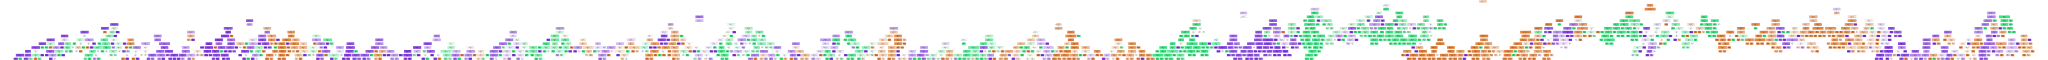

In [57]:
with open("contract.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [ ]:
list(zip(x.columns, model.feature_importances_.round(3)))

In [58]:
cd_importance = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_ })

In [59]:
cd_importance

,feature,importance
0,접수종류_11-신설(상용/임시),0.051503
1,"접수종류_14-신,증설(예비전력)",0.005775
2,접수종류_18-해지후재사용(신규),0.009298
3,접수종류_1C-신설(발전기),0.049067
4,접수종류_1D-증설(발전기),0.000000
...,...,...
97,시간적용제외코드_0 제외대상,0.001398
98,시간적용제외코드_1 450시간 적용,0.004198
99,시간적용제외코드_2 720시간 적용,0.002187
100,시간적용제외코드_5 저압 계약전력초과 적용,0.003249


In [60]:
cd_importance = cd_importance.sort_values('importance', ascending=False) 
print(cd_importance.head(20))

                     feature  importance
76           공정유형코드_01 인입선공사    0.291207
13                    공사형태_0    0.103513
74                 가공지중구분_지중    0.082288
21        계약종별_218 임시전력(을)저압    0.078714
26       계약종별_228 임시전력(을)고압A    0.072805
73                 가공지중구분_가공    0.055662
0          접수종류_11-신설(상용/임시)    0.051503
51             계약방법_0 저압일반계약    0.051072
3            접수종류_1C-신설(발전기)    0.049067
101  시간적용제외코드_6 고압 계약전력초과 적용    0.041002
53           계약방법_2 고압수전설비계약    0.010273
19         계약종별_211 일반용(갑)저압    0.009385
2         접수종류_18-해지후재사용(신규)    0.009298
17            계약종별_100 주택용전력    0.007603
12            접수종류_29-공급지점변경    0.006258
1         접수종류_14-신,증설(예비전력)    0.005775
86          전기사용용도코드_09 광공업용    0.004689
18          계약종별_108 임시전력(갑)    0.004591
5                 접수종류_21-증설    0.004277
98       시간적용제외코드_1 450시간 적용    0.004198


In [61]:
cdi = cd_importance

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

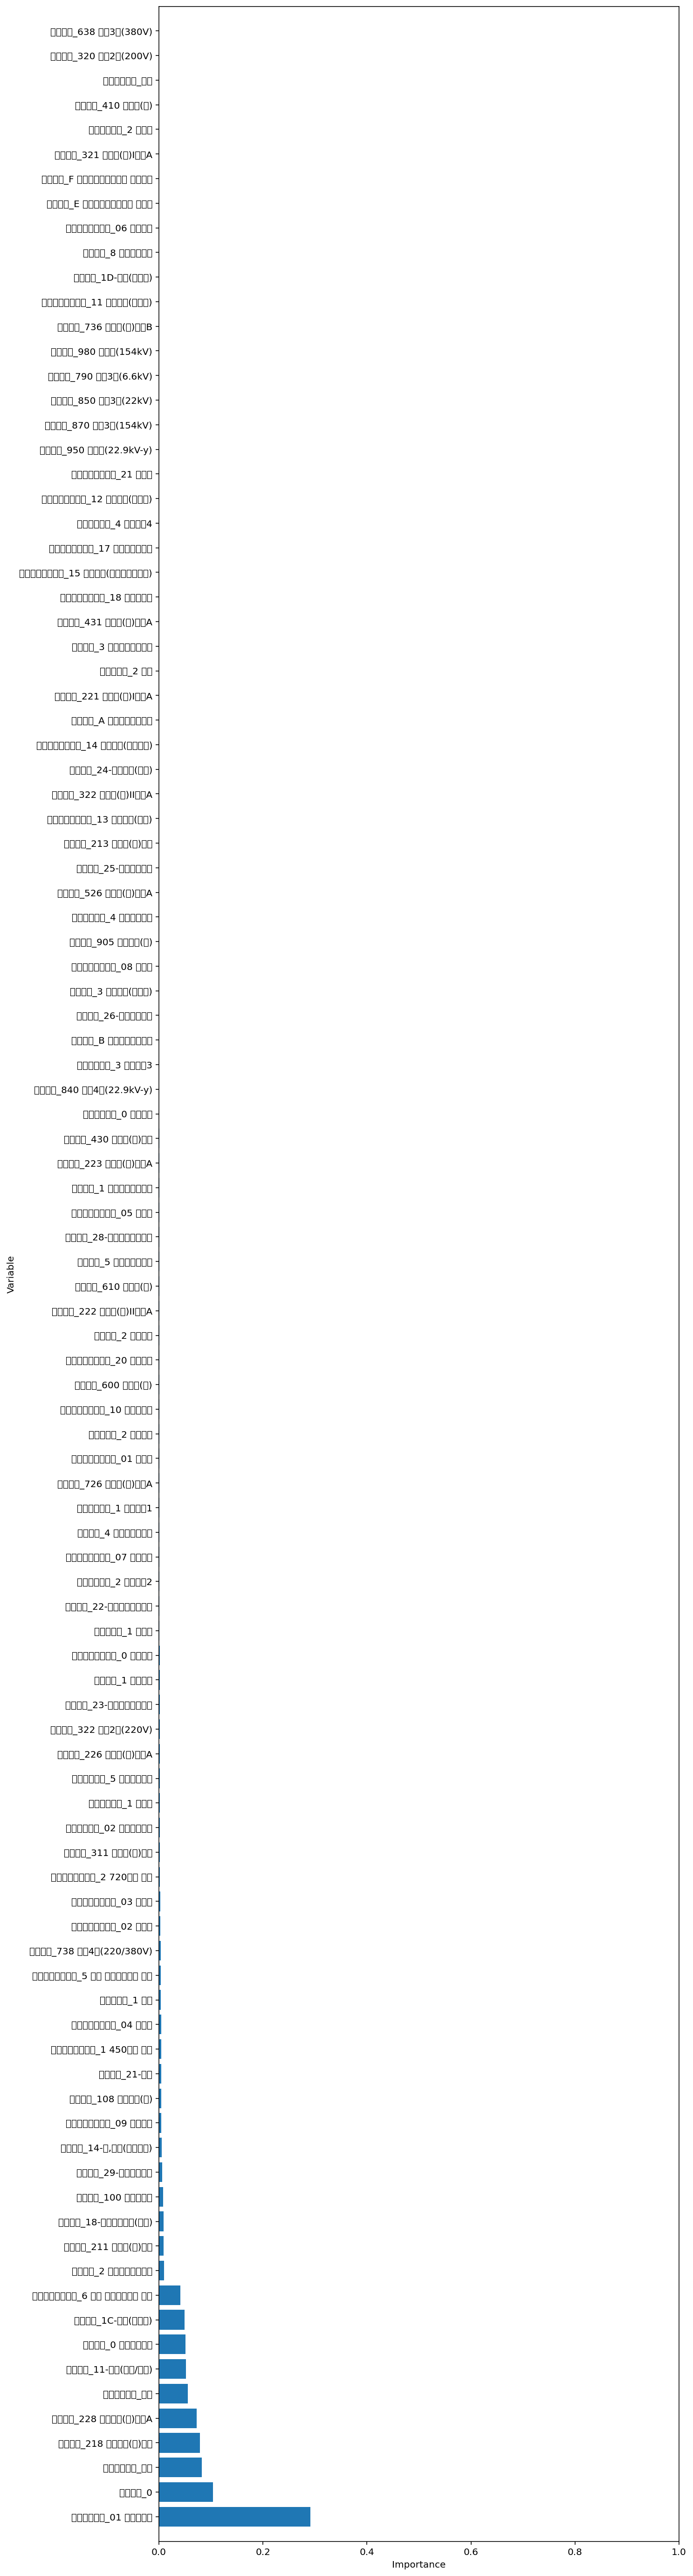

In [62]:
x = cdi.feature
y = cdi.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,50)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()

![대체 텍스트](https://)

랜덤 포레스트 분류 

In [85]:

model_rfc = RandomForestClassifier(n_estimators= 500)
model_rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8839389253962119

In [71]:
cdr_importance = pd.DataFrame({'feature':x,'importance':model_rfc.feature_importances_ })


In [72]:
cdr_importance

,feature,importance
76,공정유형코드_01 인입선공사,0.039607
13,공사형태_0,0.004413
74,가공지중구분_지중,0.016249
21,계약종별_218 임시전력(을)저압,0.039853
26,계약종별_228 임시전력(을)고압A,0.000054
...,...,...
63,공동이용구분_2 자수용,0.007264
30,계약종별_410 농사용(갑),0.010056
75,가공지중구분_혼재,0.001469
39,공급방식_320 단상2선(200V),0.006039


In [81]:
cdr_importance = cdr_importance.sort_values('importance', ascending=False) 


In [83]:
print(cdr_importance.head(20))

                 feature  importance
54       계약방법_3 사용량협정량일정    0.103649
58       계약방법_A 단일계약오피스텔    0.065818
12        접수종류_29-공급지점변경    0.064915
49            저고압구분_1 저압    0.056447
1     접수종류_14-신,증설(예비전력)    0.052504
14           공사형태_1 외선불요    0.050060
41   공급방식_638 삼상3선(380V)    0.045687
98   시간적용제외코드_1 450시간 적용    0.043018
21    계약종별_218 임시전력(을)저압    0.039853
76       공정유형코드_01 인입선공사    0.039607
22   계약종별_221 일반용(갑)I고압A    0.034364
18      계약종별_108 임시전력(갑)    0.032563
52       계약방법_1 고압부하설비계약    0.032002
17        계약종별_100 주택용전력    0.031980
32    계약종별_431 농사용(을)고압A    0.028185
23  계약종별_222 일반용(갑)II고압A    0.020043
99   시간적용제외코드_2 720시간 적용    0.017847
74             가공지중구분_지중    0.016249
55        계약방법_4 단일계약아파트    0.015792
56        계약방법_5 종합계약아파트    0.013014


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8829725550831079


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

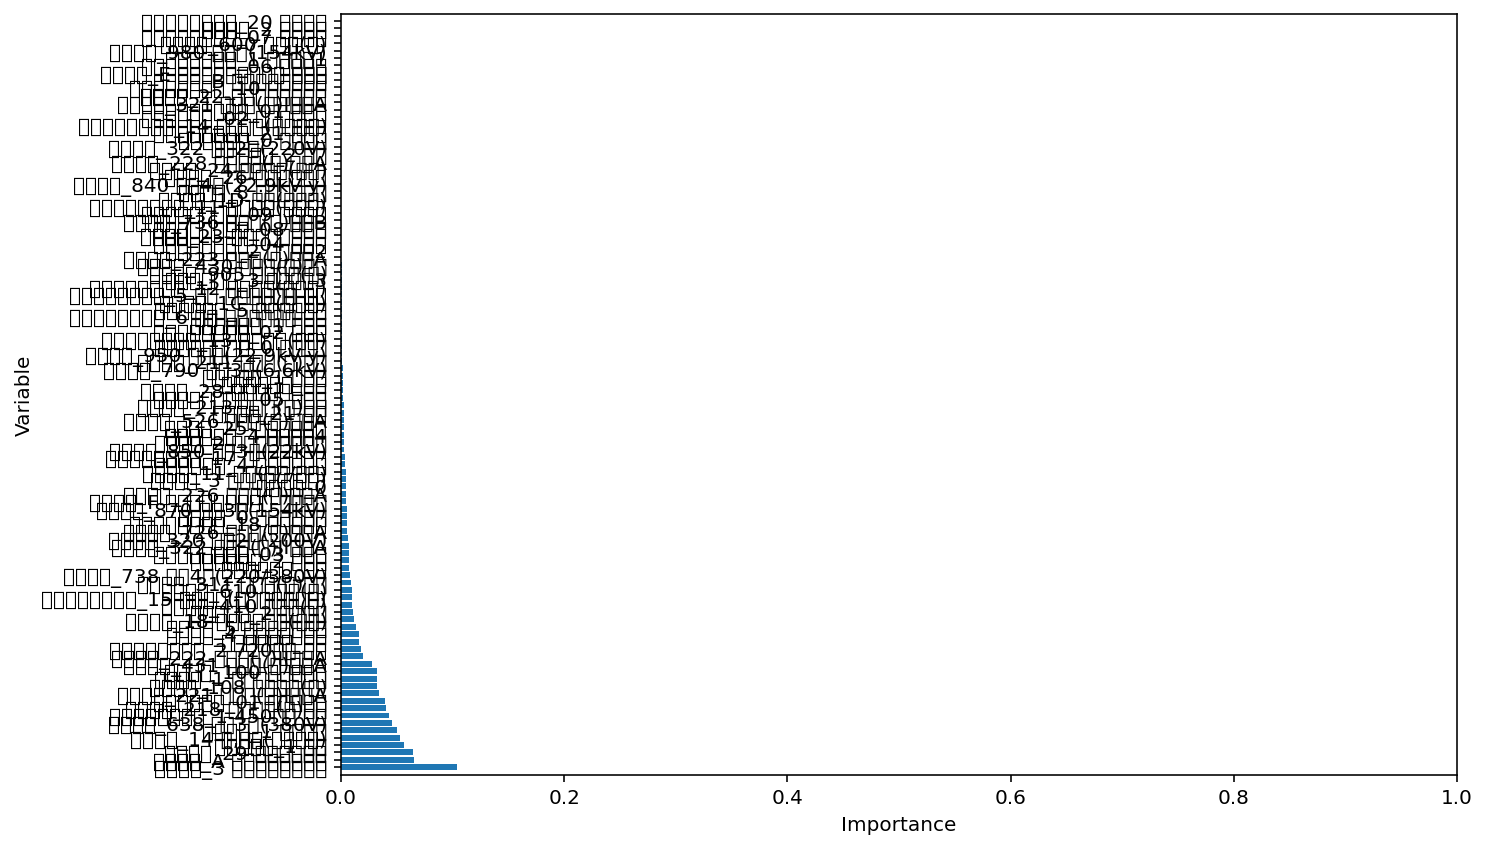

In [77]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

df = pd.DataFrame({'feature':x,'importance':model_rfc.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

In [ ]:
df = pd.DataFrame({''})

In [ ]:
y.head()

In [ ]:
#model = DecisionTreeRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [ ]:
#np.random.seed(100)
#model = RandomForestRegressor(n_estimators= 100)
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [ ]:
#def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()    
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer

In [ ]:
n_estimators = 30

max_depth_list = [10, 20, 30]
max_features_list = [0.3, 0.5, 0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=5,
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer

In [ ]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

In [ ]:
list(zip(y_test, model.predict(X_test)))[:10]

In [ ]:
hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.28072
Score = 0.22939
Score = 0.22757
Score = 0.22567
Score = 0.22878
Score = 0.22561
Score = 0.22594
Score = 0.22953
Score = 0.22665
Score = 0.23110
(10, 4)


,score,n_estimators,max_depth,max_features
5,0.225608,30,40,0.662302
3,0.225668,30,50,0.815391
6,0.225937,30,44,0.613194
8,0.226652,30,44,0.484398
2,0.227574,30,62,0.419316


In [ ]:
model = RandomForestRegressor(n_estimators=300,
                              max_depth=83,
                              max_features=0.851358,
                              random_state=37,
                              n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=83, max_features=0.851358, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [ ]:


score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.22365


In [ ]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import pandas as pd

In [ ]:
df=df.sort_values('', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()df = pd.DataFrame({'x':features,'y':model.feature_importances_ })


NameError: ignored